### RECOMMANDATIONS

Do successful freelancers have recommandations ? (need ideas to develop this part)

In [48]:
# import modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import numpy as np

df = pd.read_csv('./../../../final_parsed_malt_data_cleaned.csv')
df.head()

,name,profile_image,headline,experience,price,response_rate,response_time,categories,skills,supermalter,...,presentation,recommendations,missions,teletravail_preference,profil,link,creation_date,city,Region_Name,timestamp
0,vince huguet,No profile image,Webdesigner,-,499,1.00,1h,['Webdesigner'],['Design'],0,...,Je vous dis bonjour.,0,0,0,vincehuguet,https://www.malt.fr/profile/vincehuguet,2013-02-26,Paris,île-de-france,2013-02-26
1,Stanislas Blaineau,https://dam.malt.com/fgvxeyh2zekvtqqrfbis?grav...,développeur php symphony 2/3/4 - full stack,8-15,400,0.91,4h,"['Développeur Web Back-end', 'Développeur Web ...","['symfony 2/3/4', 'MySQL', 'jQuery', 'Bootstra...",0,...,"Développeur web full-stack PHP depuis 2012, j'...",2,0,0,stanislasblaineau,https://www.malt.fr/profile/stanislasblaineau,2013-09-23,Lyon,auvergne-rhône-alpes,2013-09-23
2,Laura Ferron,https://dam.malt.com/rhqcv7lqrx2p8ujw2bok?grav...,Product designer Senior - UX / UI - Figma,8-15,400,1.00,1h,"['UI Designer', 'UX Designer']","[""design d'interface mobile"", 'Webdesign', 'Us...",1,...,Besoin d'une aide graphique pour un nouveau pr...,18,0,0,lauraferron,https://www.malt.fr/profile/lauraferron,2014-01-18,Paris,île-de-france,2014-01-18
3,Loïc B.,No profile image,DA Web / Chef de projets,-,300,1.00,1h,['Product Manager'],"['E-commerce', 'Wordpress', 'Prestashop', 'Ado...",0,...,Après plusieurs années en agence ( création de...,0,0,0,loicbel,https://www.malt.fr/profile/loicbel,2013-05-22,Toulouse,occitanie,2013-05-22
4,Philippe De Cuzey,https://dam.malt.com/vbjgjtuddc6dxgbk28qj?grav...,data engineer senior,8-15,750,0.50,2h,['Data Engineer'],"['Python', 'Spark', 'SQL', 'noSQL', 'Apache Ka...",0,...,"free lance data engineer, working on Big Data ...",1,0,0,philippedecuzey,https://www.malt.fr/profile/philippedecuzey,2014-01-16,Paris,île-de-france,2014-01-16


In [49]:
print(df.columns)

Index(['name', 'profile_image', 'headline', 'experience', 'price',
       'response_rate', 'response_time', 'categories', 'skills', 'supermalter',
       'location', 'presentation', 'recommendations', 'missions',
       'teletravail_preference', 'profil', 'link', 'creation_date', 'city',
       'Region_Name', 'timestamp'],
      dtype='object')


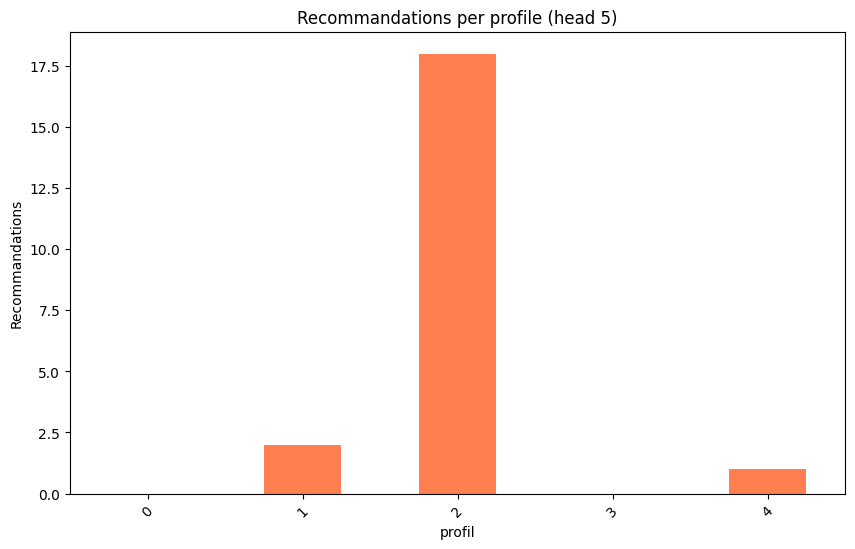

In [51]:
# Recommandations per profile
recommandations_data = df["recommendations"]

# Select the top 5 regions
top_recommandations = recommandations_data.head(5)

plt.figure(figsize=(10, 6))
top_recommandations.plot(kind='bar', color='coral')
plt.title('Recommandations per profile (head 5)')
plt.xlabel('profil')
plt.ylabel('Recommandations')
plt.xticks(rotation=45)
plt.show()

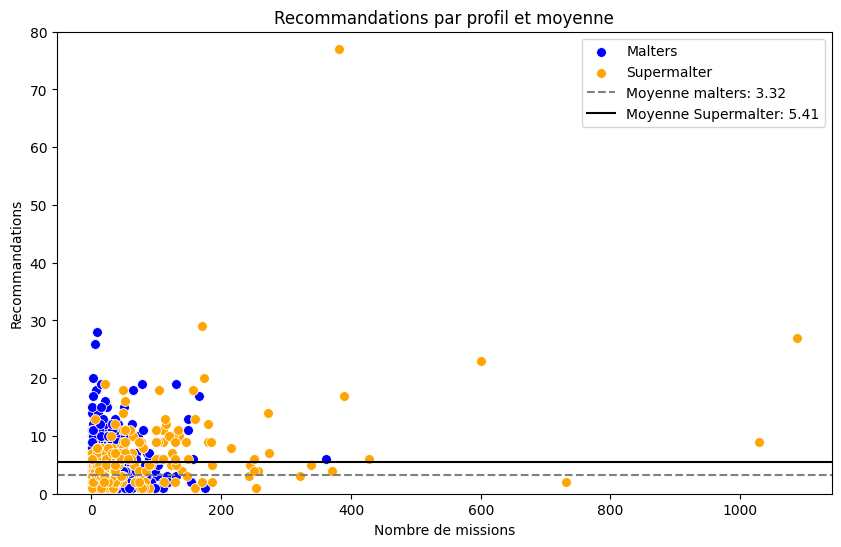

In [76]:
# Filtrer les recommandations et les missions supérieures à 0
filtered_missions = df[(df['recommendations'] > 0) & (df['missions'] > 0)]

# Filtrer les profils supermalter et malter en fonction des missions filtrées
supermalter = filtered_missions[filtered_missions['supermalter'] == 1]
malter = filtered_missions[filtered_missions['supermalter'] == 0]

# Récupérer les recommandations par profil
recommandations_malter = malter['recommendations']
recommandations_super = supermalter['recommendations']

# Récupérer le nombre de missions par profil
missions_malter = malter['missions']
missions_super = supermalter['missions']

# Tracer le scatterplot avec le nombre de missions en abscisse
plt.figure(figsize=(10, 6))

sns.scatterplot(data=malter, x='missions', y='recommendations', color='blue', s=50, label='Malters')
sns.scatterplot(data=supermalter, x='missions', y='recommendations', color='orange', s=50, label='Supermalter')

# Tracer les lignes de moyenne
plt.axhline(y=recommandations_malter.mean(), color='grey', linestyle='--', label=f'Moyenne malters: {recommandations_malter.mean():.2f}')
plt.axhline(y=recommandations_super.mean(), color='black', linestyle='-', label=f'Moyenne Supermalter: {recommandations_super.mean():.2f}')

# Ajouter des labels
plt.title('Recommandations en fonction du nombre de missions')
plt.xlabel('Nombre de missions')
plt.ylabel('Recommandations')
plt.ylim(0, 80)
plt.legend()
plt.show()
